# Project Title: E-Commerce Product Analysis and Sentiment Insights

## Objective:
Analyze customer reviews, product ratings, and pricing trends on an e-commerce platform. Perform sentiment analysis to understand customer satisfaction and identify the best-performing products.

## Dataset:
The dataset contains details about products (like product_id, category, pricing, rating, and reviews) and customer feedback (like user_name, review_title, review_content, and rating_count).

## 1: Load and Inspect the Data
Start by loading the data into a Pandas DataFrame and exploring its structure.

In [22]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')


# Load the dataset
df = pd.read_csv('amazon.csv')

# Inspect the first few rows
print(df.head())

# Check for missing data and basic column info
print(df.info())
print(df.describe())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2: Clean the Data
- Remove irrelevant columns that won’t add value to the analysis (like user_id, img_link, and product_link if you don’t need them for analysis).
- Handle missing values, especially for columns like rating and review_content.

In [23]:
# Drop irrelevant columns
df = df.drop(['user_id', 'img_link', 'product_link'], axis=1)

# Handle missing values (drop rows with missing reviews or ratings)
df = df.dropna(subset=['review_content', 'rating'])

# Convert ratings and prices to appropriate numeric types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

## 3: Sentiment Analysis
Perform sentiment analysis on the review_content to classify each review as positive, negative, or neutral. For simplicity, we’ll use TextBlob for sentiment analysis.

In [24]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['review_content'].apply(get_sentiment)

## 4: Visualizations
Now, let’s generate some insightful visualizations:

### 4.1 Distribution of Product Ratings: 
Visualize how product ratings are distributed across all products.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.show()

### 4.2 Sentiment Distribution Plot
Let’s start by visualizing how the sentiment is distributed across the dataset.

C:\Users\srini\AppData\Local\Temp\ipykernel_16996\2844930403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette='coolwarm')


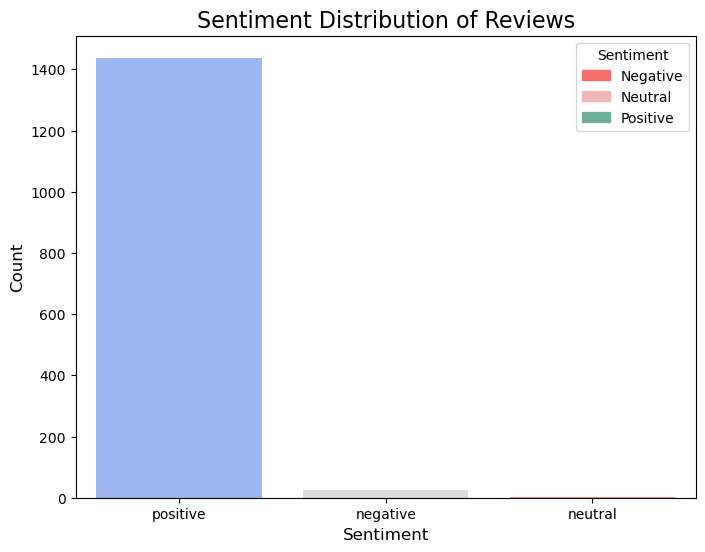

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # To create custom legend handles

# Sentiment Distribution Plot (Fixed warning with manual legend)
plt.figure(figsize=(8, 6))

# Create the count plot
ax = sns.countplot(x='sentiment', data=df, palette='coolwarm')

# Manually create the legend handles (one for each sentiment category)
handles = [mpatches.Patch(color='#F76C6C', label='Negative'),
           mpatches.Patch(color='#F1B6B6', label='Neutral'),
           mpatches.Patch(color='#6FAF99', label='Positive')]

# Add the custom legend
plt.legend(handles=handles, title="Sentiment")

# Titles and labels
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

This will show a bar chart representing the number of positive, negative, and neutral reviews.

### 4.3 Sentiment vs. Rating Plot
Next, let's explore the relationship between product ratings and sentiment. You can see if higher-rated products tend to have more positive reviews.

C:\Users\srini\AppData\Local\Temp\ipykernel_16996\1894573945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='rating', data=df, palette='coolwarm')


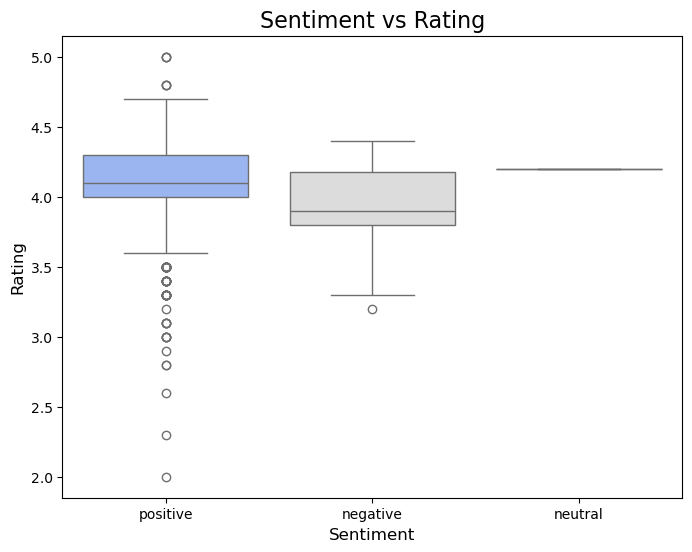

In [27]:
# Sentiment vs Rating Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='rating', data=df, palette='coolwarm')
plt.title('Sentiment vs Rating', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

This box plot will show the rating distribution for each sentiment category.

### 4.4 Top Products by Sentiment
You might want to know which products are getting the most positive or negative feedback. We can summarize the top products by sentiment:

In [28]:
# Top 10 Products with Positive Sentiment
top_positive_products = df[df['sentiment'] == 'positive'].groupby('product_name')['sentiment'].count().sort_values(ascending=False).head(10)
print("Top 10 Products with Positive Sentiment:")
print(top_positive_products)

# Top 10 Products with Negative Sentiment
top_negative_products = df[df['sentiment'] == 'negative'].groupby('product_name')['sentiment'].count().sort_values(ascending=False).head(10)
print("Top 10 Products with Negative Sentiment:")
print(top_negative_products)

Top 10 Products with Positive Sentiment:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                                                                               3
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                                                                                       3
MI Usb Type-C Cable Smartphone (Black)                                                                                                                

This will give you the most talked-about products for each sentiment (positive/negative).

## Step 5: Visualizing Ratings and Reviews

### 5.1: Visualize the Rating Distribution
To get a sense of how customers are rating the products overall, you can visualize the rating distribution:

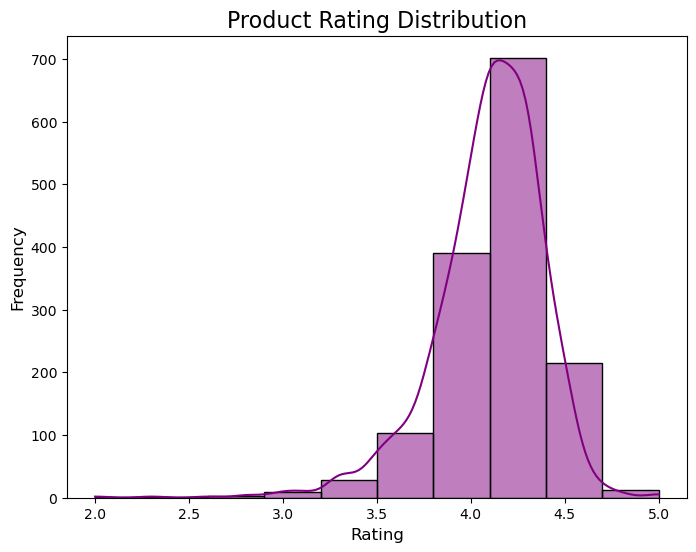

In [29]:
# Plotting the distribution of product ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='purple')
plt.title('Product Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

This histogram will show the frequency of various ratings.

### 5.2 Word Cloud of Review Content
Next, we can visualize the most common terms in the product reviews. A word cloud can provide great insights into what customers are talking about the most.

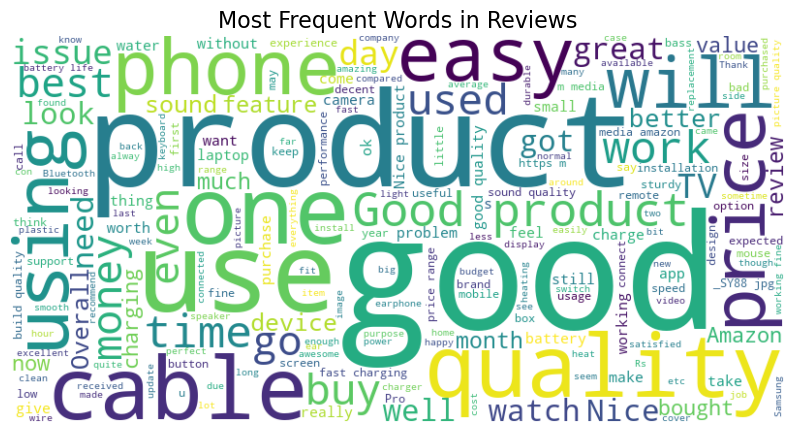

In [30]:
from wordcloud import WordCloud

# Combine all review content into one string
text = " ".join(review for review in df['review_content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews', fontsize=16)
plt.show()

This will generate a word cloud showing the most frequent terms from all reviews.